# This notebook takes post-processed flika-JSON data and plots it

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from pathlib import Path
from scipy import stats

In [128]:
# setup some global plotting properties
plt.rc('legend',fontsize=14)
plt.rcParams['legend.title_fontsize'] = 'x-large'

# Plot 1: Track Length Distributions -Stem Cells

In [129]:
# Load Track Length Data
trackLength_stemcells_input_dir = '.'
trackLength_stemcells_input_filename = 'Gabby_RIP_Talk_2021_StemCell_data_tdT_v_ht_trajLengths.csv'
trackLengths_stemcells = pd.read_csv((Path(trackLength_stemcells_input_dir) / trackLength_stemcells_input_filename), sep=',')

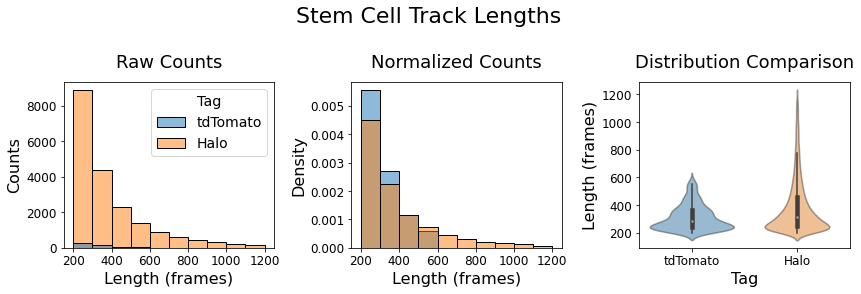

In [140]:
# Plot distributions of tdTomato vs Halo Tag (Histogram, Violin Plot, )
fig1  = plt.figure(1, figsize=(12, 4))

ax1 = plt.subplot(131)
bins = np.arange(200, 1250, 100)
sb.histplot(trackLengths_stemcells, x='Length', hue='Tag', bins=bins, stat='count', ax=ax1)

plt.suptitle('Stem Cell Track Lengths', fontsize=22, y=1.01)

ax1.set_title('Raw Counts', fontsize=18, y=1.05)
ax1.set_xlabel('Length (frames)', fontsize=16)
ax1.set_ylabel('Counts', fontsize=16)
ax1.set_xticks(np.arange(200, 1201, 200))
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2 = plt.subplot(132)
sb.histplot(x=trackLengths_stemcells.loc[trackLengths_stemcells['Tag'] == 'tdTomato']['Length'], 
            bins=bins, line_kws={'color':'k'}, stat='density', alpha=0.5,
            color='C0', ax=ax2)
sb.histplot(x=trackLengths_stemcells.loc[trackLengths_stemcells['Tag'] == 'Halo']['Length'], 
            bins=bins, line_kws={'color':'k'}, stat='density', alpha=0.5,
            color='C1', ax=ax2)
ax2.set_title('Normalized Counts', fontsize=18, y=1.05)
ax2.set_xlabel('Length (frames)', fontsize=16)
ax2.set_ylabel('Density', fontsize=16)
ax2.set_xticks(np.arange(200, 1201, 200))
ax2.tick_params(axis='both', which='major', labelsize=12)

ax3 = plt.subplot(133)
sb.violinplot(data=trackLengths_stemcells, x='Tag', y='Length', saturation=0.75)
plt.setp(ax3.collections, alpha=.5)
ax3.set_title('Distribution Comparison', fontsize=18, y=1.05)
ax3.set_xlabel('Tag', fontsize=16)
ax3.set_ylabel('Length (frames)', fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

save = False
if save:
    fig1_output_dir = '.'
    fig1_output_filename = "Figure1_StemCell_tdTomato_vs_Halo_Tag_Length_Distribs.png"
    plt.savefig((Path(fig1_output_dir) / fig1_output_filename))

plt.show()

# Plot 2: Track Length Distributions -Kera Cells

In [141]:
# Load Track Length Data
trackLength_keracells_input_dir = '.'
trackLength_keracells_input_filename = 'Gabby_RIP_Talk_2021_KeraCell_data_tdT_v_ht_trajLengths.csv'
trackLengths_keracells = pd.read_csv((Path(trackLength_keracells_input_dir) / trackLength_keracells_input_filename), sep=',')

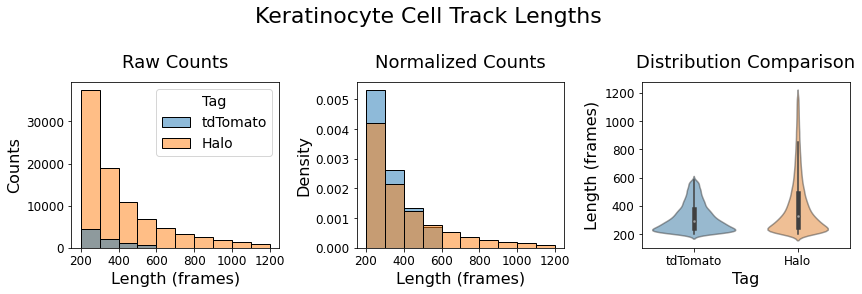

In [144]:
# Plot distributions of tdTomato vs Halo Tag (Histogram, Violin Plot, )
fig2  = plt.figure(1, figsize=(12, 4))

ax1 = plt.subplot(131)
bins = np.arange(200, 1250, 100)
sb.histplot(trackLengths_keracells, x='Length', hue='Tag', bins=bins, stat='count', ax=ax1)

plt.suptitle('Keratinocyte Cell Track Lengths', fontsize=22, y=1.01)

ax1.set_title('Raw Counts', fontsize=18, y=1.05)
ax1.set_xlabel('Length (frames)', fontsize=16)
ax1.set_ylabel('Counts', fontsize=16)
ax1.set_xticks(np.arange(200, 1201, 200))
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2 = plt.subplot(132)
sb.histplot(x=trackLengths_keracells.loc[trackLengths_keracells['Tag'] == 'tdTomato']['Length'], 
            bins=bins, line_kws={'color':'k'}, stat='density', alpha=0.5,
            color='C0', ax=ax2)
sb.histplot(x=trackLengths_keracells.loc[trackLengths_keracells['Tag'] == 'Halo']['Length'], 
            bins=bins, line_kws={'color':'k'}, stat='density', alpha=0.5,
            color='C1', ax=ax2)
ax2.set_title('Normalized Counts', fontsize=18, y=1.05)
ax2.set_xlabel('Length (frames)', fontsize=16)
ax2.set_ylabel('Density', fontsize=16)
ax2.set_xticks(np.arange(200, 1201, 200))
ax2.tick_params(axis='both', which='major', labelsize=12)

ax3 = plt.subplot(133)
sb.violinplot(data=trackLengths_keracells, x='Tag', y='Length', saturation=0.75)
plt.setp(ax3.collections, alpha=.5)
ax3.set_title('Distribution Comparison', fontsize=18, y=1.05)
ax3.set_xlabel('Tag', fontsize=16)
ax3.set_ylabel('Length (frames)', fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

save = False
if save:
    fig2_output_dir = '.'
    fig2_output_filename = "Figure2_KeraCell_tdTomato_vs_Halo_Tag_Length_Distribs.png"
    plt.savefig((Path(fig2_output_dir) / fig2_output_filename))

plt.show()

In [145]:
sc_tdt_counts = len(trackLengths_stemcells.loc[trackLengths_stemcells['Tag'] == 'tdTomato'].ID.unique())
sc_halo_counts = len(trackLengths_stemcells.loc[trackLengths_stemcells['Tag'] == 'Halo'].ID.unique())
kera_tdt_counts = len(trackLengths_keracells.loc[trackLengths_keracells['Tag'] == 'tdTomato'].ID.unique())
kera_halo_counts = len(trackLengths_keracells.loc[trackLengths_keracells['Tag'] == 'Halo'].ID.unique())

print("For reference, the track counts are below:\n")
print("Track Counts\n| Cell Types | Fluoro Tag | Trk Counts |")
print("----------------------------------------")
print(f"| Stem Cells |  tdTomato  |      {sc_tdt_counts}   |")
print(f"| Stem Cells |    Halo    |    {sc_halo_counts}   |")
print(f"| Kera Cells |  tdTomato  |     {kera_tdt_counts}   |")
print(f"| Kera Cells |    Halo    |    {kera_halo_counts}   |")

For reference, the track counts are below:

Track Counts
| Cell Types | Fluoro Tag | Trk Counts |
----------------------------------------
| Stem Cells |  tdTomato  |      489   |
| Stem Cells |    Halo    |    19708   |
| Kera Cells |  tdTomato  |     8213   |
| Kera Cells |    Halo    |    88759   |


# Plot 3: Tracks per Unit Area -Stem Cells

In [146]:
# Input the data Gabby put together

cellArea_sc_halo_exp_names =    [   'GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plate1_9', 
                                    'GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plate1_10',
                                    'GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plate1_11',
                                    'GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plate1_12',
                                    'GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plate1_21',
                                ]
cellArea_sc_halo_DICs = [10, 11, 12, 13, 23]
cellArea_sc_halo_Areas = [269.9, 69.86, 179.1, 201.2, 149.1]

cellArea_sc_tdt_exp_names =     [   'AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_14', 
                                    'AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_17',
                                    'AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_18',
                                    'AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_20',
                                    'AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_21',
                                ]
cellArea_sc_tdt_DICs = [13, 16, 17, 19, 20]
cellArea_sc_tdt_Areas = [6253.97, 4315.67, 7568.77, 8217.92, 9572.89]

cellArea_kera_halo_exp_names =  [   'GB_tracks_threshold5_232_2020_06_17_HaloTag_Kera_A_2', 
                                    'GB_tracks_threshold5_232_2020_06_17_HaloTag_Kera_A_3',
                                    'GB_tracks_threshold5_232_2020_06_17_HaloTag_Kera_A_5',
                                    'GB_tracks_threshold5_232_2020_06_17_HaloTag_Kera_A_8',
                                    'GB_tracks_threshold5_232_2020_06_17_HaloTag_Kera_A_9',
                                ]
cellArea_kera_halo_DICs = [2, 3, 5, 8, 9]
cellArea_kera_halo_Areas = [8770.0, 9095.0, 6974.0, 11440.0, 8792.0]

cellArea_kera_tdt_exp_names =   [   '300_2021_03_08_mkera_tdT_diff_C_5', 
                                    '300_2021_03_08_mkera_tdT_diff_B_7',
                                    '300_2021_03_08_mkera_tdT_diff_B_11',
                                    '300_2021_03_08_mkera_tdT_diff_C_19',
                                    '300_2021_03_08_mkera_tdT_diff_C_3',
                                ]
cellArea_kera_tdt_DICs = [0, 0, 0, 0, 0]
cellArea_kera_tdt_Areas = [4951.73, 10746.02, 8775.80, 9622.22, 7505.27]

In [147]:
# Make dataframes based on data Gabby analyzed
cellAreas_tdt_stemCells = pd.DataFrame([], columns=['Exp_Name', 'Cell_Type', 'Tag', 'DIC_number', 'Area'])
cellAreas_tdt_keraCells = cellAreas_tdt_stemCells.copy()
cellAreas_halo_stemCells = cellAreas_tdt_stemCells.copy()
cellAreas_halo_keraCells = cellAreas_tdt_stemCells.copy()

cellAreas_tdt_stemCells['Area'] = cellArea_sc_tdt_Areas
cellAreas_tdt_stemCells['DIC_number'] = cellArea_sc_tdt_DICs
cellAreas_tdt_stemCells['Tag'] = 'tdTomato'
cellAreas_tdt_stemCells['Cell_Type'] = 'mNSPC'
cellAreas_tdt_stemCells['Exp_Name'] = cellArea_sc_tdt_exp_names

cellAreas_tdt_keraCells['Area'] = cellArea_kera_tdt_Areas
cellAreas_tdt_keraCells['DIC_number'] = cellArea_kera_tdt_DICs
cellAreas_tdt_keraCells['Tag'] = 'tdTomato'
cellAreas_tdt_keraCells['Cell_Type'] = 'mKera'
cellAreas_tdt_keraCells['Exp_Name'] = cellArea_kera_tdt_exp_names

cellAreas_halo_stemCells['Area'] = cellArea_sc_halo_Areas
cellAreas_halo_stemCells['DIC_number'] = cellArea_sc_halo_DICs
cellAreas_halo_stemCells['Tag'] = 'Halo'
cellAreas_halo_stemCells['Cell_Type'] = 'NSC'
cellAreas_halo_stemCells['Exp_Name'] = cellArea_sc_halo_exp_names

cellAreas_halo_keraCells['Area'] = cellArea_kera_halo_Areas
cellAreas_halo_keraCells['DIC_number'] = cellArea_kera_halo_DICs
cellAreas_halo_keraCells['Tag'] = 'Halo'
cellAreas_halo_keraCells['Cell_Type'] = 'Kera'
cellAreas_halo_keraCells['Exp_Name'] = cellArea_kera_halo_exp_names

cellAreas_stemCells = pd.concat([cellAreas_tdt_stemCells, cellAreas_halo_stemCells])
cellAreas_keraCells = pd.concat([cellAreas_tdt_keraCells, cellAreas_halo_keraCells])

In [148]:
# Now add the track counts data in as a column
trk_counts_sc = []
for each_exp in cellAreas_stemCells.Exp_Name.unique():
    trkCount = len(trackLengths_stemcells[trackLengths_stemcells['Exp_Name'] == each_exp].ID.unique())
    trk_counts_sc.append(trkCount)
cellAreas_stemCells['Trk_Count'] = trk_counts_sc
cellAreas_stemCells['Tracks_Area'] = cellAreas_stemCells['Trk_Count'] / cellAreas_stemCells['Area']

trk_counts_kera = []
for each_exp in cellAreas_keraCells.Exp_Name.unique():
    trkCount = len(trackLengths_keracells[trackLengths_keracells['Exp_Name'] == each_exp].ID.unique())
    trk_counts_kera.append(trkCount)
cellAreas_keraCells['Trk_Count'] = trk_counts_kera
cellAreas_keraCells['Tracks_Area'] = cellAreas_keraCells['Trk_Count'] / cellAreas_keraCells['Area']

In [149]:
trkArea_tdt_sc = cellAreas_stemCells.loc[cellAreas_stemCells['Tag'] == 'tdTomato'][['Tag', 'Tracks_Area']]
trkArea_halo_sc = cellAreas_stemCells.loc[cellAreas_stemCells['Tag'] == 'Halo'][['Tag', 'Tracks_Area']]
trkArea_sc = pd.concat([trkArea_tdt_sc, trkArea_halo_sc])

trkArea_tdt_kera = cellAreas_keraCells.loc[cellAreas_keraCells['Tag'] == 'tdTomato'][['Tag', 'Tracks_Area']]
trkArea_halo_kera = cellAreas_keraCells.loc[cellAreas_keraCells['Tag'] == 'Halo'][['Tag', 'Tracks_Area']]
trkArea_kera = pd.concat([trkArea_tdt_kera, trkArea_halo_kera])

# Now actually plot the stuff

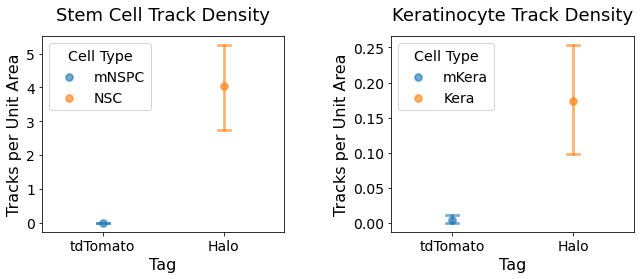

In [157]:
fig3  = plt.figure(1, figsize=(9, 4))

ax1 = plt.subplot(121)
g = sb.pointplot(x='Tag', y='Tracks_Area', data=trkArea_sc, join=False, ax=ax1, hue='Tag', alpha=0.5, capsize=0.1)
plt.setp(g.collections, alpha=.6)
plt.setp(g.lines, alpha=.6)
ax1.set_title('Stem Cell Track Density', fontsize=18, y=1.05)
ax1.set_xlabel('Tag', fontsize=16)
ax1.set_ylabel('Tracks per Unit Area', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
lg = plt.legend(loc='upper left', title='Cell Type')
lg.get_texts()[0].set_text('mNSPC')
lg.get_texts()[1].set_text('NSC')

ax2 = plt.subplot(122)
g = sb.pointplot(x='Tag', y='Tracks_Area', data=trkArea_kera, join=False, ax=ax2, hue='Tag', alpha=0.5, capsize=0.1)
plt.setp(g.collections, alpha=.6)
plt.setp(g.lines, alpha=.6)
ax2.set_title('Keratinocyte Track Density', fontsize=18, y=1.05)
ax2.set_xlabel('Tag', fontsize=16)
ax2.set_ylabel('Tracks per Unit Area', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
lg = plt.legend(loc='upper left', title='Cell Type')
lg.get_texts()[0].set_text('mKera')
lg.get_texts()[1].set_text('Kera')

plt.tight_layout(w_pad=5)

save = False
if save:
    fig2_output_dir = '.'
    fig2_output_filename = "Figure3_tdTomato_vs_Halo_Tag_Tracks_per_Unit_Area.png"
    plt.savefig((Path(fig2_output_dir) / fig2_output_filename), bbox_inches='tight')

plt.show()

In [158]:
trkArea_kera

,Tag,Tracks_Area
0,tdTomato,0.007876
1,tdTomato,0.000000
2,tdTomato,0.000000
3,tdTomato,0.016420
4,tdTomato,0.000000
0,Halo,0.090194
1,Halo,0.072787
2,Halo,0.297677
3,Halo,0.260227
4,Halo,0.150250


In [161]:
trkArea_sc

,Tag,Tracks_Area
0,tdTomato,0.000480
1,tdTomato,0.000463
2,tdTomato,0.000661
3,tdTomato,0.000243
4,tdTomato,0.001149
0,Halo,2.782512
1,Halo,5.811623
2,Halo,2.384143
3,Halo,5.864811
4,Halo,3.299799


In [162]:
cellAreas_keraCells

,Exp_Name,Cell_Type,Tag,DIC_number,Area,Trk_Count,Tracks_Area
0,300_2021_03_08_mkera_tdT_diff_C_5,mKera,tdTomato,0,4951.73,39,0.007876
1,300_2021_03_08_mkera_tdT_diff_B_7,mKera,tdTomato,0,10746.02,0,0.000000
2,300_2021_03_08_mkera_tdT_diff_B_11,mKera,tdTomato,0,8775.80,0,0.000000
3,300_2021_03_08_mkera_tdT_diff_C_19,mKera,tdTomato,0,9622.22,158,0.016420
4,300_2021_03_08_mkera_tdT_diff_C_3,mKera,tdTomato,0,7505.27,0,0.000000
0,GB_tracks_threshold5_232_2020_06_17_HaloTag_Ke...,Kera,Halo,2,8770.00,791,0.090194
1,GB_tracks_threshold5_232_2020_06_17_HaloTag_Ke...,Kera,Halo,3,9095.00,662,0.072787
2,GB_tracks_threshold5_232_2020_06_17_HaloTag_Ke...,Kera,Halo,5,6974.00,2076,0.297677
3,GB_tracks_threshold5_232_2020_06_17_HaloTag_Ke...,Kera,Halo,8,11440.00,2977,0.260227
4,GB_tracks_threshold5_232_2020_06_17_HaloTag_Ke...,Kera,Halo,9,8792.00,1321,0.150250


In [163]:
cellAreas_stemCells

,Exp_Name,Cell_Type,Tag,DIC_number,Area,Trk_Count,Tracks_Area
0,AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_14,mNSPC,tdTomato,13,6253.97,3,0.000480
1,AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_17,mNSPC,tdTomato,16,4315.67,2,0.000463
2,AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_18,mNSPC,tdTomato,17,7568.77,5,0.000661
3,AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_20,mNSPC,tdTomato,19,8217.92,2,0.000243
4,AL_42_2020-02-28-TIRFM_Diff_tdt-mNSPCs_B_21,mNSPC,tdTomato,20,9572.89,11,0.001149
0,GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plat...,NSC,Halo,10,269.90,751,2.782512
1,GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plat...,NSC,Halo,11,69.86,406,5.811623
2,GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plat...,NSC,Halo,12,179.10,427,2.384143
3,GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plat...,NSC,Halo,13,201.20,1180,5.864811
4,GB_62_2021_01_27_NSC_HaloTag_NonBAPTA_646_plat...,NSC,Halo,23,149.10,492,3.299799
